# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

DINESHKUMAR MURUGIAH

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Select the folder having data files
os.chdir('../Datasets and Dictionary/trip_records')

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data


#os.chdir('../Datasets and Dictionary/trip_records')

file_list = sorted([f for f in os.listdir() if f.endswith(".parquet")])

target_total_rows = 300_000
monthly_target = target_total_rows // len(file_list)  # ~25,000 per month
df = pd.DataFrame()  # Final result placeholder

# Step 4: Process each month
for file_name in file_list:
    try:
        print(f"Processing {file_name}")
        file_path = os.path.join(os.getcwd(), file_name)

        monthly_df = pd.read_parquet(file_path)

        monthly_df["tpep_pickup_datetime"] = pd.to_datetime(monthly_df["tpep_pickup_datetime"])

        monthly_df["pickup_date"] = monthly_df["tpep_pickup_datetime"].dt.date
        monthly_df["pickup_hour"] = monthly_df["tpep_pickup_datetime"].dt.hour
        
        month_name = monthly_df["tpep_pickup_datetime"].dt.month_name().iloc[0]
        print(month_name)
        total_mnth_rows = monthly_df.shape[0]
        print(f"total rows{total_mnth_rows}")
        
        # Group by (date, hour)
        groups = monthly_df.groupby(["pickup_date", "pickup_hour"])

        total_hourly_rows = sum(len(g) for _, g in groups)
  
        hourly_sampled = pd.DataFrame()
        for (pickup_date, pickup_hour), group in groups:
            group_size = len(group)
            sample_size = int((group_size / total_hourly_rows) * monthly_target)
            if sample_size > 0:
                sample = group.sample(n=sample_size, random_state=42)
                hourly_sampled = pd.concat([hourly_sampled, sample], ignore_index=True)

        df = pd.concat([df, hourly_sampled], ignore_index=True)

    except Exception as e:
        print(f" Error reading {file_name}: {e}")

df.drop(columns=["pickup_date", "pickup_hour"], inplace=True, errors='ignore')
# Save final output
df.to_csv("nyc_taxi_sampled_2023.csv", index=False)
#df.info()

Processing 2023-1.parquet
January
total rows3041714
Processing 2023-10.parquet
October
total rows3485185
Processing 2023-11.parquet
November
total rows3302857
Processing 2023-12.parquet
December
total rows3333925
Processing 2023-2.parquet
March
total rows3374086
Processing 2023-3.parquet
June
total rows3275796
Processing 2023-4.parquet
August
total rows2792901
Processing 2023-5.parquet
February
total rows2889185
Processing 2023-6.parquet
April
total rows3258261
Processing 2023-7.parquet
May
total rows3481547
Processing 2023-8.parquet
July
total rows2875947
Processing 2023-9.parquet
September
total rows2817156


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
tf  = pd.read_csv("nyc_taxi_sampled_2023.csv")


In [10]:
tf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [11]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295605 entries, 0 to 295604
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               295605 non-null  int64  
 1   tpep_pickup_datetime   295605 non-null  object 
 2   tpep_dropoff_datetime  295605 non-null  object 
 3   passenger_count        285807 non-null  float64
 4   trip_distance          295605 non-null  float64
 5   RatecodeID             285807 non-null  float64
 6   store_and_fwd_flag     285807 non-null  object 
 7   PULocationID           295605 non-null  int64  
 8   DOLocationID           295605 non-null  int64  
 9   payment_type           295605 non-null  int64  
 10  fare_amount            295605 non-null  float64
 11  extra                  295605 non-null  float64
 12  mta_tax                295605 non-null  float64
 13  tip_amount             295605 non-null  float64
 14  tolls_amount           295605 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed

tf.drop(columns=["store_and_fwd_flag"], inplace=True)
tf.reset_index(drop=True, inplace=True)
tf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
print(tf[(~tf["airport_fee"].isna()) & (~tf["Airport_fee"].isna())].shape)
tf["airport_fee"] = tf["airport_fee"].fillna(tf["Airport_fee"])
tf.drop(columns=["Airport_fee"], inplace=True)
print(tf["airport_fee"].isna().sum())
tf.info()

(0, 19)
9798
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295605 entries, 0 to 295604
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               295605 non-null  int64  
 1   tpep_pickup_datetime   295605 non-null  object 
 2   tpep_dropoff_datetime  295605 non-null  object 
 3   passenger_count        285807 non-null  float64
 4   trip_distance          295605 non-null  float64
 5   RatecodeID             285807 non-null  float64
 6   PULocationID           295605 non-null  int64  
 7   DOLocationID           295605 non-null  int64  
 8   payment_type           295605 non-null  int64  
 9   fare_amount            295605 non-null  float64
 10  extra                  295605 non-null  float64
 11  mta_tax                295605 non-null  float64
 12  tip_amount             295605 non-null  float64
 13  tolls_amount           295605 non-null  float64
 14  improvement_surcharge  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative


columns_to_check = [
    "tip_amount", "tolls_amount", "total_amount","improvement_surcharge","fare_amount",
    "mta_tax", "extra", "congestion_surcharge", "airport_fee","tolls_amount"
]

for col in columns_to_check:
    count = (tf[col] < 0).sum()
    print(f"Negative values in {col}: {count}")

Negative values in tip_amount: 0
Negative values in tolls_amount: 0
Negative values in total_amount: 11
Negative values in improvement_surcharge: 11
Negative values in fare_amount: 0
Negative values in mta_tax: 11
Negative values in extra: 1
Negative values in congestion_surcharge: 6
Negative values in airport_fee: 2
Negative values in tolls_amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts



In [16]:
# Find which columns have negative values

columns_to_check = [
    "tip_amount", "tolls_amount", "total_amount","improvement_surcharge","fare_amount",
    "mta_tax", "extra", "congestion_surcharge", "airport_fee","tolls_amount"
]

for col in columns_to_check:
    count = (tf[col] < 0).sum()
    print(f"Negative values in {col}: {count}")

negative_mask = (tf[columns_to_check] < 0).any(axis=1)
negative_row_count = negative_mask.sum()
print(f"Total rows with at least one negative monetary value: {negative_row_count}")
tf.info()

Negative values in tip_amount: 0
Negative values in tolls_amount: 0
Negative values in total_amount: 11
Negative values in improvement_surcharge: 11
Negative values in fare_amount: 0
Negative values in mta_tax: 11
Negative values in extra: 1
Negative values in congestion_surcharge: 6
Negative values in airport_fee: 2
Negative values in tolls_amount: 0
Total rows with at least one negative monetary value: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295605 entries, 0 to 295604
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               295605 non-null  int64  
 1   tpep_pickup_datetime   295605 non-null  object 
 2   tpep_dropoff_datetime  295605 non-null  object 
 3   passenger_count        285807 non-null  float64
 4   trip_distance          295605 non-null  float64
 5   RatecodeID             285807 non-null  float64
 6   PULocationID           295605 non-null  int64  
 

In [17]:
# fix these negative values
mask = (tf[columns_to_check].fillna(0) >= 0).all(axis=1)
tf = tf[mask].copy()
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295593 entries, 0 to 295604
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               295593 non-null  int64  
 1   tpep_pickup_datetime   295593 non-null  object 
 2   tpep_dropoff_datetime  295593 non-null  object 
 3   passenger_count        285795 non-null  float64
 4   trip_distance          295593 non-null  float64
 5   RatecodeID             285795 non-null  float64
 6   PULocationID           295593 non-null  int64  
 7   DOLocationID           295593 non-null  int64  
 8   payment_type           295593 non-null  int64  
 9   fare_amount            295593 non-null  float64
 10  extra                  295593 non-null  float64
 11  mta_tax                295593 non-null  float64
 12  tip_amount             295593 non-null  float64
 13  tolls_amount           295593 non-null  float64
 14  improvement_surcharge  295593 non-null  f

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
missing_ratios = tf.isna().mean().sort_values(ascending=False)
missing_ratios_percent = (missing_ratios * 100).round(2)
print("Percentage of missing values per column:\n")
print(missing_ratios_percent)


Percentage of missing values per column:

RatecodeID               3.31
passenger_count          3.31
airport_fee              3.31
congestion_surcharge     3.31
tpep_pickup_datetime     0.00
VendorID                 0.00
PULocationID             0.00
DOLocationID             0.00
tpep_dropoff_datetime    0.00
trip_distance            0.00
fare_amount              0.00
payment_type             0.00
extra                    0.00
mta_tax                  0.00
tolls_amount             0.00
tip_amount               0.00
total_amount             0.00
improvement_surcharge    0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_passengers = tf[tf["passenger_count"].isna()]
print(f" Rows with missing passenger_count: {len(missing_passengers)}")
most_common = tf["passenger_count"].mode().iloc[0]
print(f"Most common passanger count: {most_common}")
tf["passenger_count"] = tf["passenger_count"].fillna(most_common)
zero_passangers=tf[tf["passenger_count"]==0]
print(f" Rows with zero passenger_count: {len(zero_passangers)}")
tf.loc[tf["passenger_count"] == 0, "passenger_count"] = most_common
print(f" Rows with zero passenger_count after fix: {len(zero_passangers)}")


 Rows with missing passenger_count: 9798
Most common passanger count: 1.0
 Rows with zero passenger_count: 4548
 Rows with zero passenger_count after fix: 4548


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'
import geopandas as gpd

zones = gpd.read_file("../taxi_zones/taxi_zones.shp")

missing_ratecode = tf["RatecodeID"].isna().sum()
print(f"Rows with missing RatecodeID: {missing_ratecode}")
missing_mask = tf["RatecodeID"].isna()
jfk_mask = (tf["PULocationID"] == 132) | (tf["DOLocationID"] == 132)
newark_mask = (tf["PULocationID"] == 1) | (tf["DOLocationID"] == 1)
group_ride_mask = tf["passenger_count"] > 3

tf.loc[missing_mask & jfk_mask, "RatecodeID"] = 2
tf.loc[missing_mask & newark_mask, "RatecodeID"] = 3
tf.loc[group_ride_mask, "RatecodeID"] = 6

short_distance_threshold = 2.0       
high_fare_threshold = 30.0 

negotiated_mask = (
    (tf["trip_distance"] <= short_distance_threshold) &
    (tf["fare_amount"] >= high_fare_threshold)
)

tf.loc[negotiated_mask, "RatecodeID"] = 5

ratecode_mode = tf["RatecodeID"].mode().iloc[0]
print(f"ratecode_mode:{ratecode_mode}")
tf.loc[missing_mask,"RatecodeID"]=ratecode_mode

missing_ratecode = tf["RatecodeID"].isna().sum()
print(f"Rows with missing RatecodeID: {missing_ratecode}")


Rows with missing RatecodeID: 9798
ratecode_mode:1.0
Rows with missing RatecodeID: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge

null_congestion = tf[tf["congestion_surcharge"].isna()]
missing_count = null_congestion.shape[0]
print(f"Missing congestion_surcharge: {missing_count}")

null_congestion.head()

tf = tf[~tf["congestion_surcharge"].isna()].copy()
tf.reset_index(drop=True, inplace=True)

null_congestion = tf[tf["congestion_surcharge"].isna()]
missing_count = null_congestion.shape[0]
print(f"Missing congestion_surcharge: {missing_count}")

Missing congestion_surcharge: 9798
Missing congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values
missing_summary = tf.isna().sum()
missing_summary = missing_summary[missing_summary > 0]

print("Remaining missing values:\n", missing_summary)

Remaining missing values:
 Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

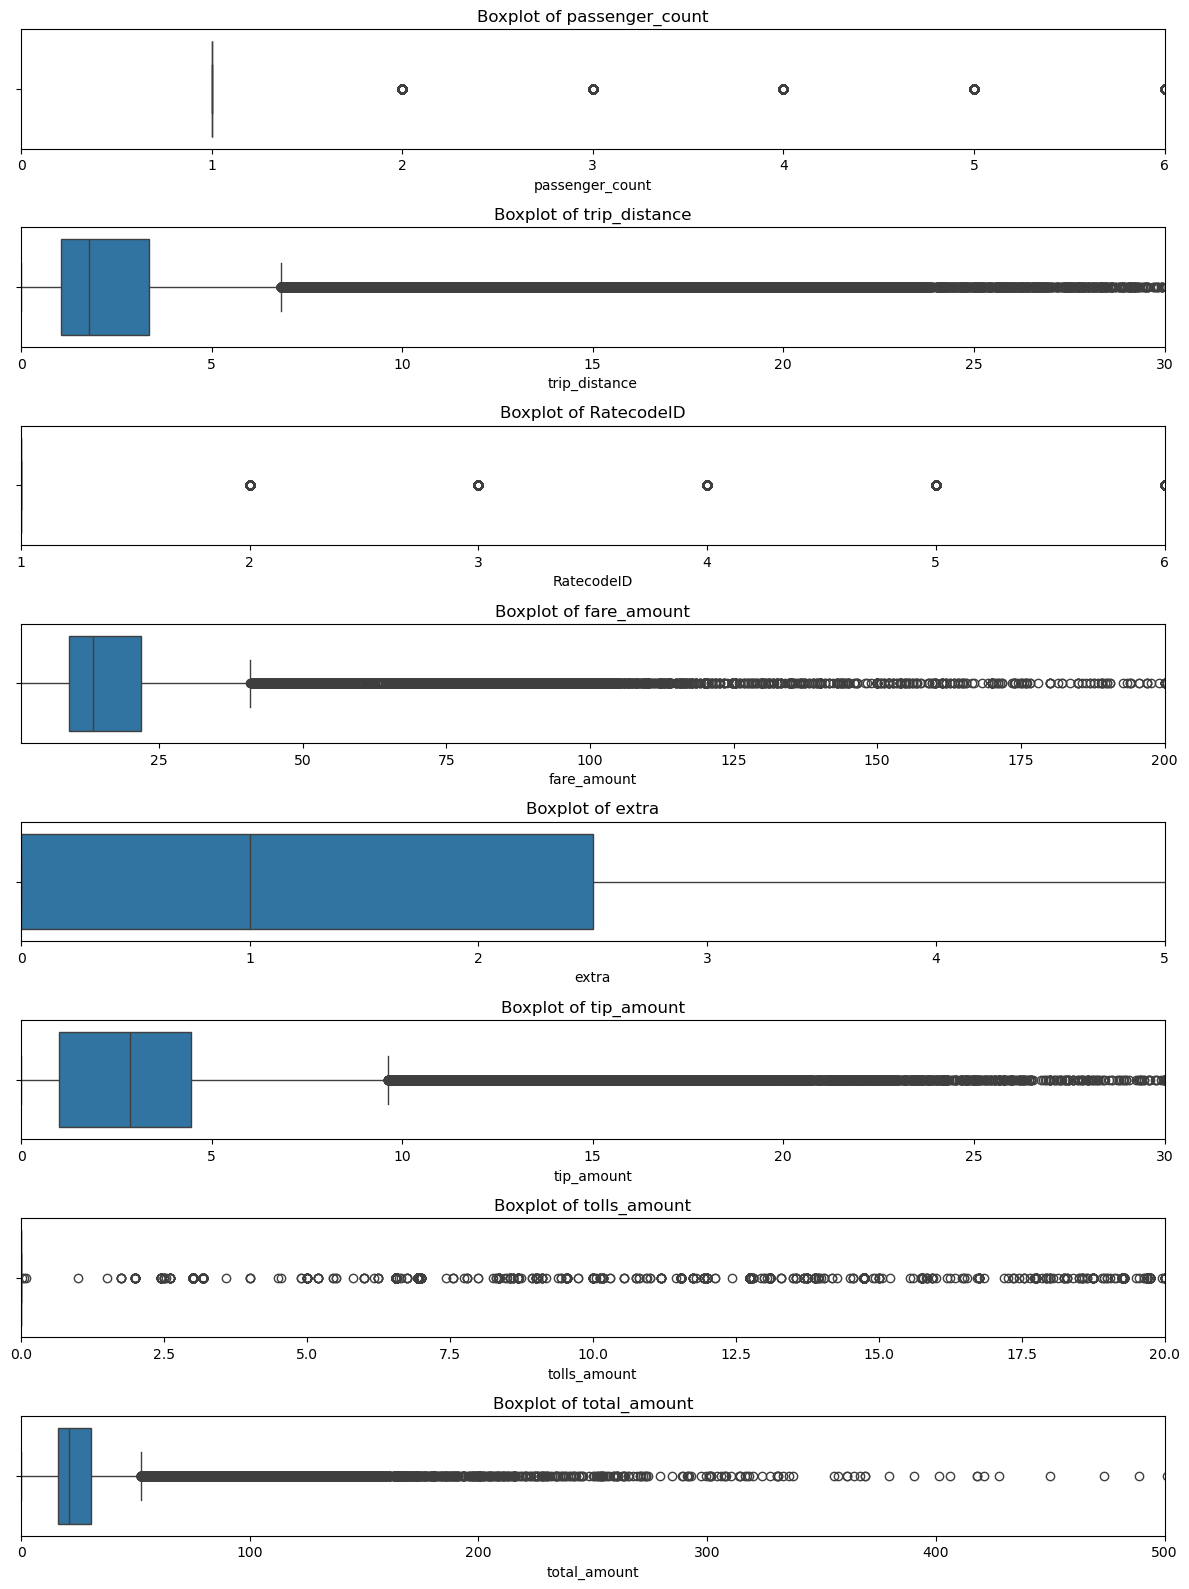

In [23]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import seaborn as sns
import matplotlib.pyplot as plt

tf.describe(include='all')

cols = [
    "passenger_count", "trip_distance", "RatecodeID", "fare_amount",
    "extra", "tip_amount", "tolls_amount", "total_amount"
]

xlims = {
    "passenger_count": (0, 6),
    "trip_distance": (0, 30),
    "RatecodeID": (1, 6),
    "fare_amount": (1, 200),
    "extra": (0, 5),
    "tip_amount": (0, 30),
    "tolls_amount": (0, 20),
    "total_amount": (0, 500),
}

plt.figure(figsize=(12, len(cols) * 2))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.boxplot(x=tf[col], orient="h")
    plt.xlim(xlims[col]) 
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6
tf = tf[tf["passenger_count"] <= 6].copy()

In [25]:
# Continue with outlier handling
suspicious_fares = tf[(tf["trip_distance"] < 5) & (tf["fare_amount"] > 300)]
print(f"High fare with very low distance: {len(suspicious_fares)} rows")

zero_fare_distance = tf[
    (tf["trip_distance"] == 0) &
    (tf["fare_amount"] == 0) &
    (tf["PULocationID"] != tf["DOLocationID"])
]
print(f"Zero fare & distance but different zones: {len(zero_fare_distance)} rows")

long_trips = tf[tf["trip_distance"] > 100]
print(f"Unrealistic long trips (>100 miles): {len(long_trips)} rows")

tf["computed_total"] = (
    tf["fare_amount"]
    + tf["extra"]
    + tf["mta_tax"]
    + tf["tip_amount"]
    + tf["tolls_amount"]
    + tf["improvement_surcharge"]
    + tf["congestion_surcharge"]
    + tf["airport_fee"]
)

# Check mismatches between computed and reported total_amount
mismatch_mask = ~tf["total_amount"].round(2).eq(tf["computed_total"].round(2))
mismatch_count = mismatch_mask.sum()

print(f"Rows with mismatched total_amount: {mismatch_count}")

mask_high_fare_low_dist = (tf["trip_distance"] < 5) & (tf["fare_amount"] > 300)
tf = tf[~mask_high_fare_low_dist]

suspicious_fares = tf[(tf["trip_distance"] < 5) & (tf["fare_amount"] > 300)]
print(f"High fare with very low distance: {len(suspicious_fares)} rows")

mask_zero_fare_dist_diff_zones = (
    (tf["trip_distance"] == 0) &
    (tf["fare_amount"] == 0) &
    (tf["PULocationID"] != tf["DOLocationID"])
)
tf = tf[~mask_zero_fare_dist_diff_zones]

tf = tf[tf["trip_distance"] <= 100]

long_trips = tf[tf["trip_distance"] > 100]
print(f"Unrealistic long trips (>100 miles): {len(long_trips)} rows")

tf["total_amount"] = (
    tf["fare_amount"] + tf["extra"] + tf["mta_tax"] + tf["tip_amount"] +
    tf["tolls_amount"] + tf["improvement_surcharge"] +
    tf["congestion_surcharge"] + tf["airport_fee"]
).round(2)


High fare with very low distance: 8 rows
Zero fare & distance but different zones: 6 rows
Unrealistic long trips (>100 miles): 3 rows
Rows with mismatched total_amount: 71348
High fare with very low distance: 0 rows
Unrealistic long trips (>100 miles): 0 rows


In [26]:
# Do any columns need standardising?


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [27]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

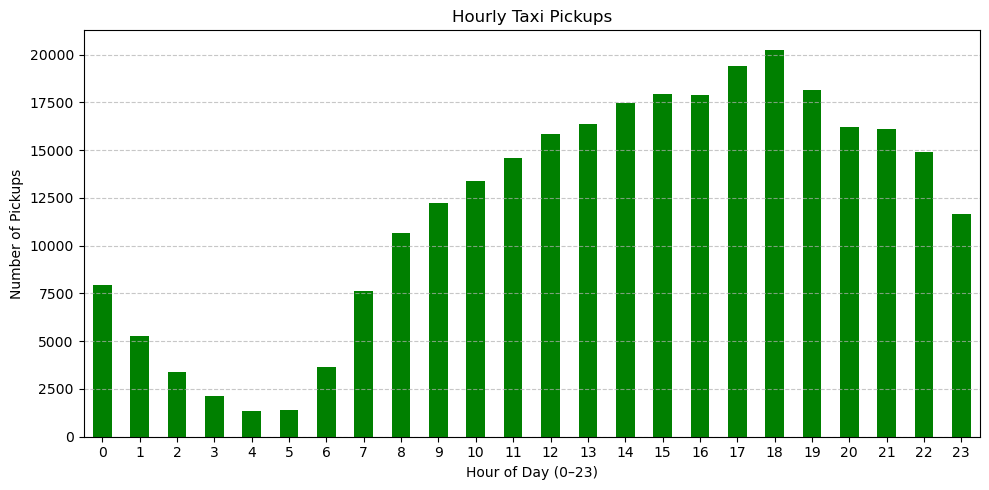

In [28]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt


tf["pickup_datetime"] = pd.to_datetime(tf["tpep_pickup_datetime"])
tf["pickup_hour"] = tf["pickup_datetime"].dt.hour
tf["pickup_dayofweek"] = tf["pickup_datetime"].dt.dayofweek 
tf["pickup_month"] = tf["pickup_datetime"].dt.month

hourly_counts = tf["pickup_hour"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hourly_counts.plot(kind="bar", color="green")
plt.title("Hourly Taxi Pickups")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

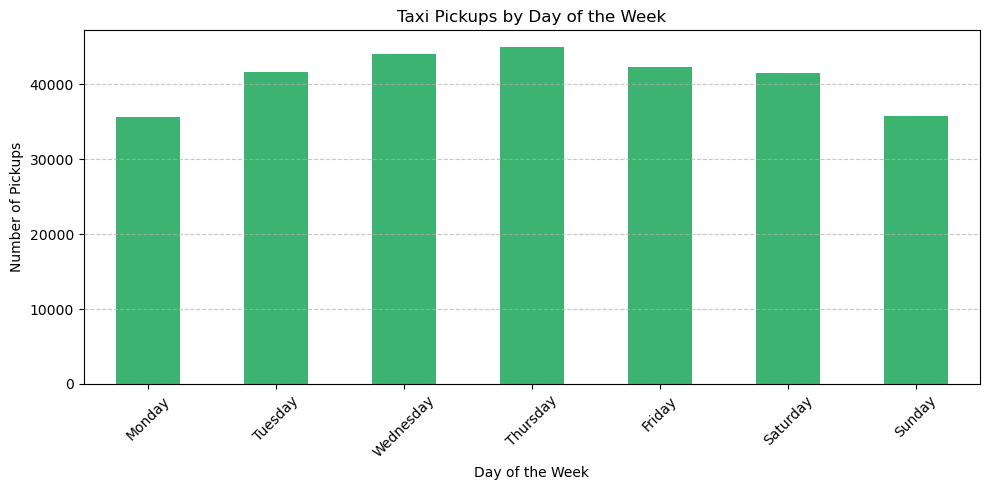

In [29]:
# Find and show the daily trends in taxi pickups (days of the week)

day_name_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
tf["pickup_dayname"] = tf["pickup_dayofweek"].map(day_name_map)

day_counts = tf["pickup_dayname"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
day_counts.plot(kind="bar", color="mediumseagreen")
plt.title("Taxi Pickups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

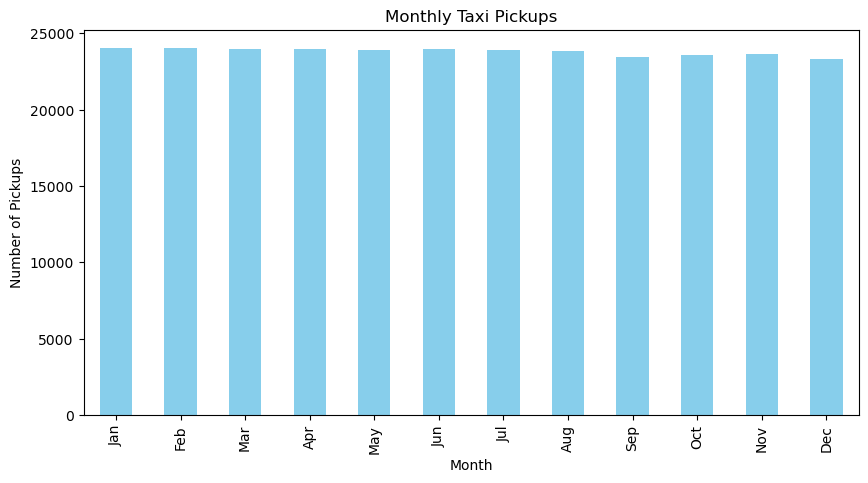

In [30]:
# Show the monthly trends in pickups

month_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
tf["pickup_month_name"] = tf["pickup_month"].map(month_map)

monthly_counts = tf["pickup_month_name"].value_counts().reindex(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind="bar", color="skyblue")
plt.title("Monthly Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [31]:
# Analyse the above parameters
columns_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

for col in columns_to_check:
    zero_count = (tf[col] == 0).sum()
    negative_count = (tf[col] < 0).sum()
    print(f"{col}: Zero values = {zero_count}, Negative values = {negative_count}")



fare_amount: Zero values = 84, Negative values = 0
tip_amount: Zero values = 63919, Negative values = 0
total_amount: Zero values = 36, Negative values = 0
trip_distance: Zero values = 3508, Negative values = 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [32]:
# Create a df with non zero entries for the selected parameters.

invalid_zero_mask = (tf["fare_amount"] == 0) | (tf["total_amount"] == 0)

print(f"Number of rows with invalid zero values: {invalid_zero_mask.sum()}")

# Apply filter
tf = tf[~invalid_zero_mask].copy()

tf = tf[~((tf["trip_distance"] == 0) & (tf["PULocationID"] != tf["DOLocationID"]))].copy()

print(f"Data shape after removal: {tf.shape}")

Number of rows with invalid zero values: 84
Data shape after removal: (284521, 25)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

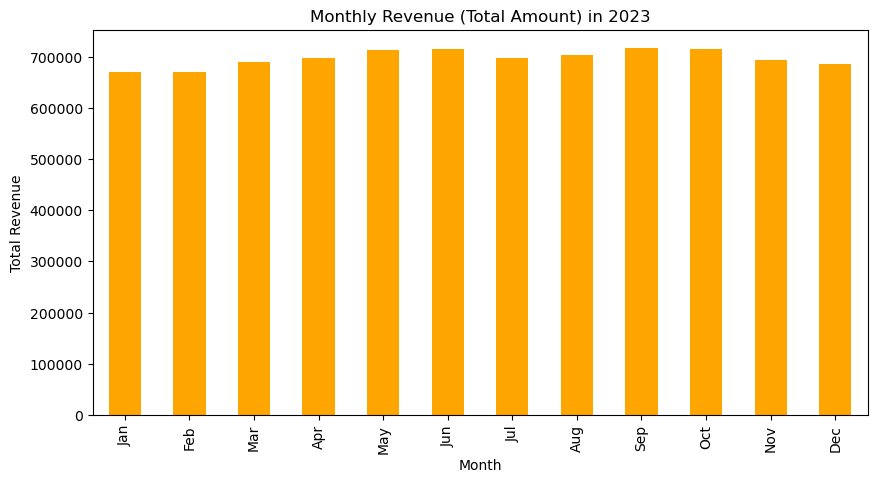

In [33]:
# Group data by month and analyse monthly revenue

tf["tpep_pickup_datetime"] = pd.to_datetime(tf["tpep_pickup_datetime"])

tf["pickup_month"] = tf["tpep_pickup_datetime"].dt.month

monthly_revenue = tf.groupby("pickup_month")["total_amount"].sum()

# Plot the monthly revenue trend
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='bar', color='orange')
plt.title("Monthly Revenue (Total Amount) in 2023")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportions (%):
pickup_quarter
2023Q1    24.26
2023Q2    25.40
2023Q3    25.31
2023Q4    25.03
Freq: Q-DEC, Name: total_amount, dtype: float64


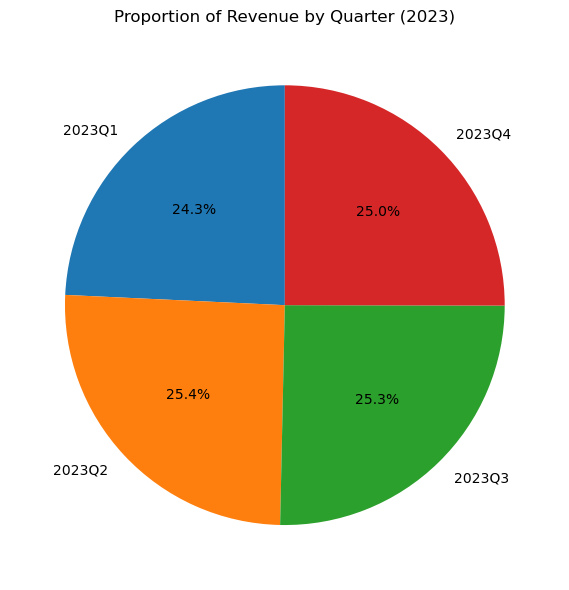

In [34]:
# Calculate proportion of each quarter

tf["pickup_quarter"] = tf["tpep_pickup_datetime"].dt.to_period("Q")

quarterly_revenue = tf.groupby("pickup_quarter")["total_amount"].sum()

revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

print("Quarterly Revenue Proportions (%):")
print(revenue_proportion.round(2))


plt.figure(figsize=(8, 6))
revenue_proportion.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    ylabel=""
)
plt.title("Proportion of Revenue by Quarter (2023)")
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

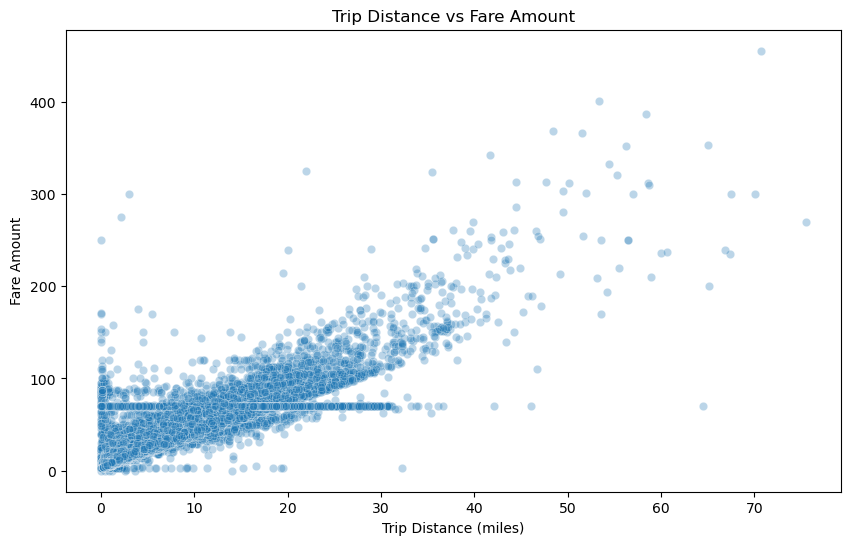

Pearson Correlation between trip_distance and fare_amount: 0.946


In [35]:
# Show how trip fare is affected by distance

filtered_tf = tf[tf["trip_distance"] > 0].copy()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_tf,
    x="trip_distance",
    y="fare_amount",
    alpha=0.3
)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")
plt.show()

# Compute correlation
correlation = filtered_tf["trip_distance"].corr(filtered_tf["fare_amount"])
print(f"Pearson Correlation between trip_distance and fare_amount: {correlation:.3f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

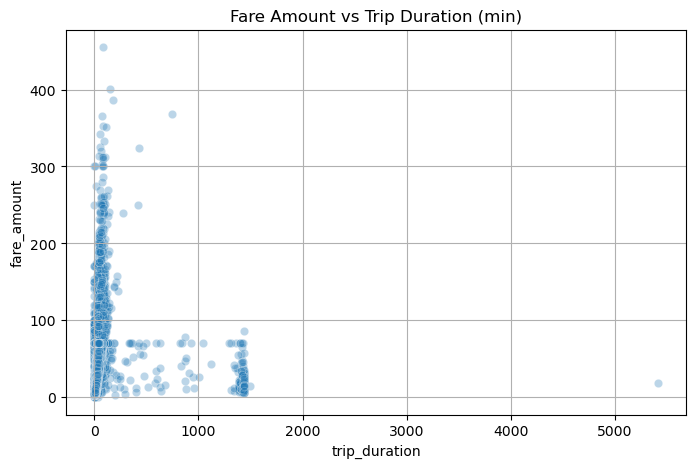

In [36]:
# Show relationship between fare and trip duration
tf["tpep_pickup_datetime"] = pd.to_datetime(tf["tpep_pickup_datetime"])
tf["tpep_dropoff_datetime"] = pd.to_datetime(tf["tpep_dropoff_datetime"])

tf["trip_duration"] = (tf["tpep_dropoff_datetime"] - tf["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Filter out zero or negative durations
filtered = tf[(tf["trip_duration"] > 0) & (tf["fare_amount"] > 0) & (tf["trip_distance"] > 0)]

# 1. fare_amount vs trip_duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered, x="trip_duration", y="fare_amount", alpha=0.3)
plt.title("Fare Amount vs Trip Duration (min)")
plt.grid(True)
plt.show()

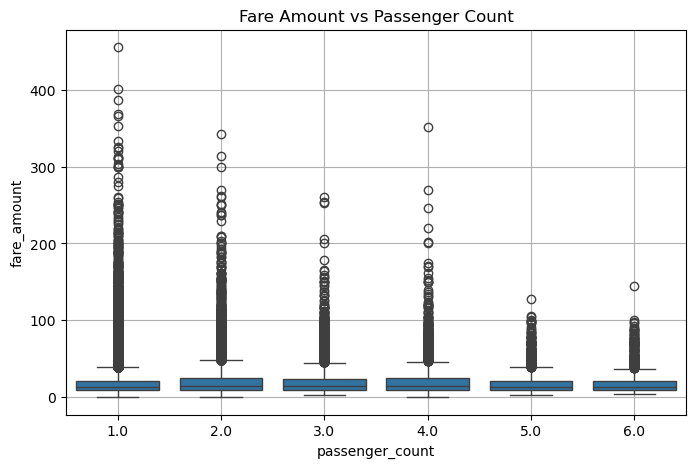

Correlation (fare_amount vs passenger_count): 0.042


In [37]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered, x="passenger_count", y="fare_amount")
plt.title("Fare Amount vs Passenger Count")
plt.grid(True)
plt.show()

corr2 = filtered["fare_amount"].corr(filtered["passenger_count"])
print(f"Correlation (fare_amount vs passenger_count): {corr2:.3f}")

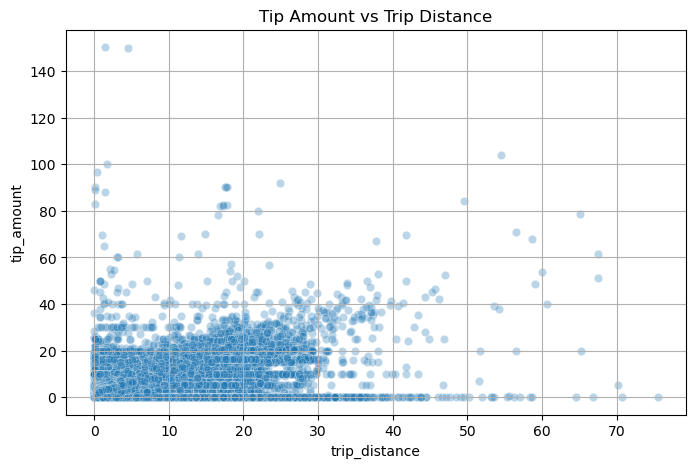

Correlation (tip_amount vs trip_distance): 0.590


In [38]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered, x="trip_distance", y="tip_amount", alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.grid(True)
plt.show()

corr3 = filtered["tip_amount"].corr(filtered["trip_distance"])
print(f"Correlation (tip_amount vs trip_distance): {corr3:.3f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

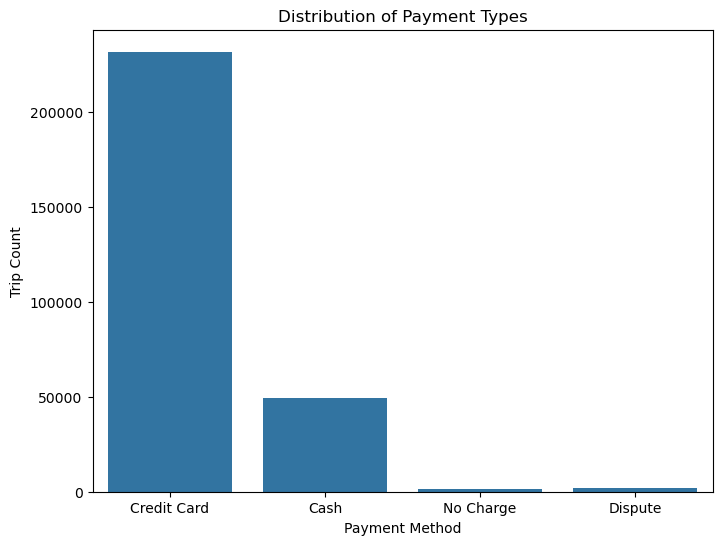

In [39]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = tf["payment_type"].value_counts().sort_index()
payment_percent = round((payment_counts / payment_counts.sum()) * 100, 2)

payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Map codes to labels
payment_labels = payment_counts.index.map(payment_mapping)

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_labels, y=payment_counts.values)
plt.title("Distribution of Payment Types")
plt.ylabel("Trip Count")
plt.xlabel("Payment Method")
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [40]:
# !pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [41]:
# import geopandas as gpd



# Read the shapefile using geopandas
zones = gpd.read_file("../taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Figure size 1200x1200 with 0 Axes>

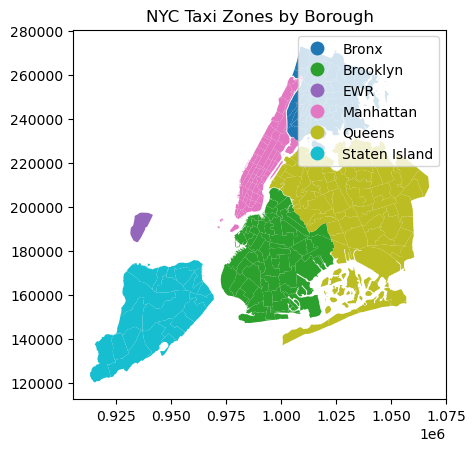

In [42]:
# print(zones.info())
# zones.plot()
plt.figure(figsize=(12, 12))
zones.plot(column="borough", legend=True)
plt.title("NYC Taxi Zones by Borough", fontsize=12)
plt.show()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [43]:
# Merge zones and trip records using locationID and PULocationID

tf = tf.merge(
    zones[["LocationID", "zone", "borough"]],
    left_on="PULocationID",
    right_on="LocationID",
    how="left"
)

tf.rename(columns={"zone": "pickup_zone", "borough": "pickup_borough"}, inplace=True)

tf.drop(columns=["LocationID"], inplace=True)

tf[["PULocationID", "pickup_zone", "pickup_borough"]].head()


PULocationID                pickup_zone pickup_borough
0           138          LaGuardia Airport         Queens
1           161             Midtown Center      Manhattan
2           237      Upper East Side South      Manhattan
3           143        Lincoln Square West      Manhattan
4           246  West Chelsea/Hudson Yards      Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [44]:
# Group data by location and calculate the number of trips

pickup_counts = tf.groupby("PULocationID").size().reset_index(name="trip_count")

pickup_counts = pickup_counts.sort_values(by="trip_count", ascending=False)

pickup_counts.head()

pickup_stats = pickup_counts.merge(
    zones[["LocationID", "zone", "borough"]],
    left_on="PULocationID",
    right_on="LocationID",
    how="left"
)

pickup_stats = pickup_stats.drop(columns=["LocationID"])
pickup_stats.head()

PULocationID  trip_count                   zone    borough
0           132       15030            JFK Airport     Queens
1           237       13470  Upper East Side South  Manhattan
2           161       13364         Midtown Center  Manhattan
3           236       12036  Upper East Side North  Manhattan
4           162       10311           Midtown East  Manhattan

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Figure size 1200x1000 with 0 Axes>

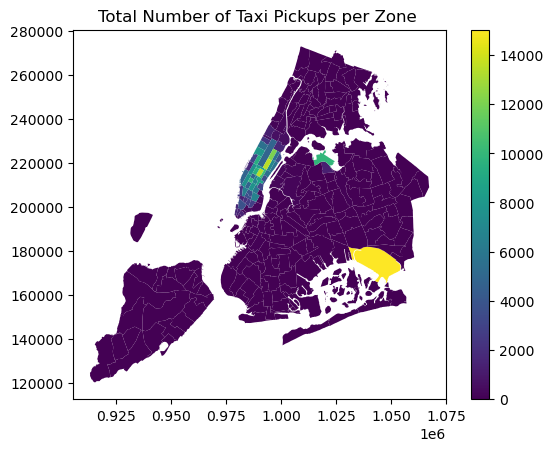

In [45]:
# Merge trip counts back to the zones GeoDataFrame

pickup_counts = tf.groupby("PULocationID").size().reset_index(name="trip_count")

zones_with_counts = zones.merge(pickup_counts, how="left", left_on="LocationID", right_on="PULocationID")

zones_with_counts["trip_count"] = zones_with_counts["trip_count"].fillna(0)

plt.figure(figsize=(12, 10))
zones_with_counts.plot(column="trip_count",legend=True)
plt.title("Total Number of Taxi Pickups per Zone ", fontsize=12)
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

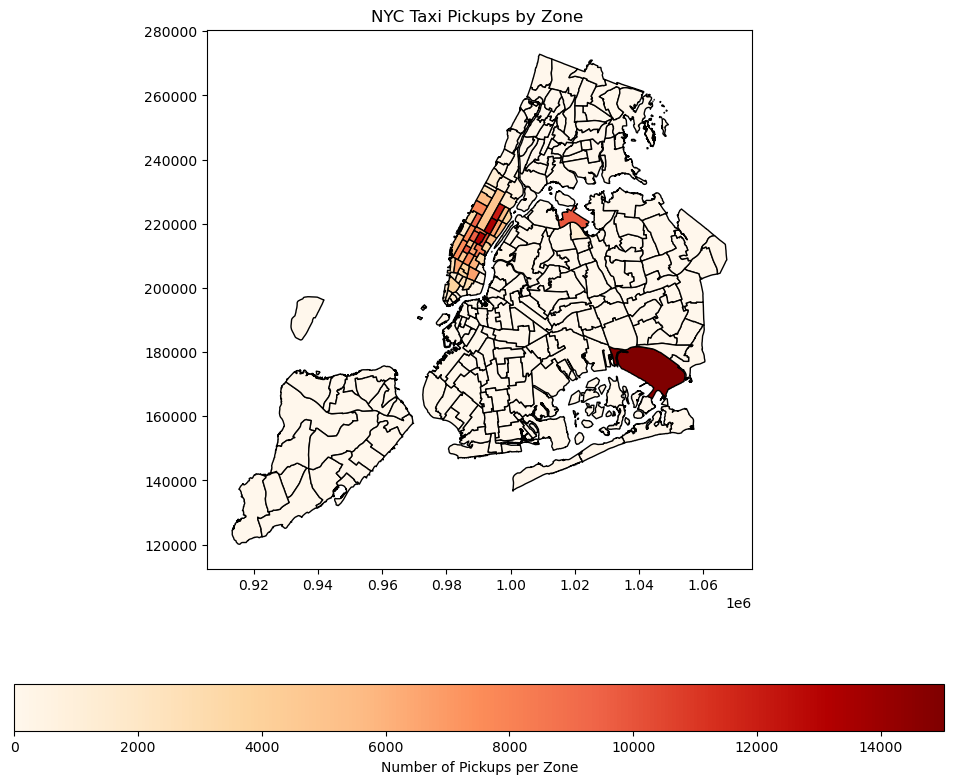

In [88]:
# Define figure and axis


# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_counts.plot(
    column="trip_count",          
    ax=ax,                        
    legend=True,                  
    cmap="OrRd",                  
    edgecolor="black",            
    legend_kwds={
        'label': "Number of Pickups per Zone",
        'orientation': "horizontal"
    }
)

ax.set_title("NYC Taxi Pickups by Zone ", fontsize=12)


plt.show()


In [47]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones_with_counts.sort_values(by="trip_count", ascending=False)
sorted_zones[["LocationID", "zone", "borough", "trip_count"]].head(10)

tf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4           7.10         1.0           246            37             1   

   fare_amount  ...     pickup_datetime  pickup_hour  pickup_dayofweek  \
0         32.4  ... 2023-01-01 00:07:18            0                 6   
1          7.9  ... 2023-01-01 00:16:41            0                 6   
2         11.4  ... 2023-01-01 00:14:03            0                 6   
3          6.5  ... 2023-01-01 00:24:30            0                 6   
4         34.5  ... 2023-01-01 00:42:56            0                 6   

   pickup_month  pickup_dayname  pickup_month_name  pickup_quarter  \
0             1          Sunday                Jan          2023Q1   
1             1          Sunday                Jan          2023Q1   
2             1          Sunday                Jan          2023Q1   
3             1          Sunday                Jan          2023Q1   
4             1          Sunday                Jan          2023Q1   

   trip_duration                pickup_zone pickup_borough  
0      15.950000          LaGuardia Airport         Queens  
1       5.083333             Midtown Center      Manhattan  
2      10.550000      Upper East Side South      Manhattan  
3       5.416667        Lincoln Square West      Manhattan  
4      33.616667  West Chelsea/Hudson Yards      Manhattan  

[5 rows x 29 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

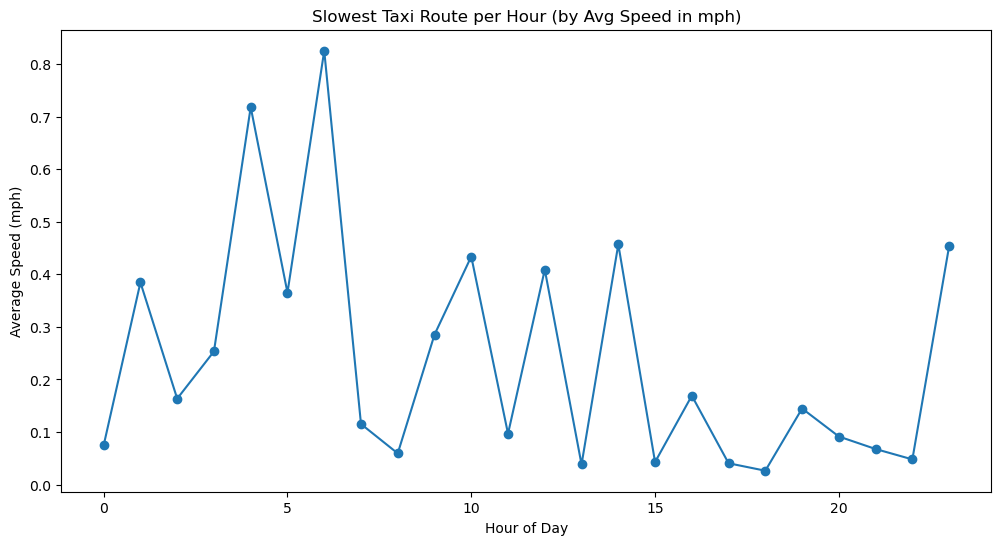

In [48]:
# Find routes which have the slowest speeds at different times of the day
valid_tf = tf[(tf['trip_distance'] > 0) & (tf['trip_duration'] > 0)]

grouped = valid_tf.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    total_distance=('trip_distance', 'sum'),
    total_duration=('trip_duration', 'sum'),
    trip_count=('trip_distance', 'count')
).reset_index()


grouped['avg_speed_mph'] = (grouped['total_distance'] / grouped['total_duration'])*60

# For each hour, find the slowest route (minimum average speed)
slowest_routes_by_hour = grouped.loc[grouped.groupby('pickup_hour')['avg_speed_mph'].idxmin()]

# Sort by hour 
slowest_routes_by_hour = slowest_routes_by_hour.sort_values(by='pickup_hour')

slowest_routes_by_hour = slowest_routes_by_hour.merge(
    zones.rename(columns={"LocationID": "PULocationID", "zone": "pickup_zone"}),
    on="PULocationID", how="left"
)

#  get dropoff zone names
slowest_routes_by_hour = slowest_routes_by_hour.merge(
    zones.rename(columns={"LocationID": "DOLocationID", "zone": "dropoff_zone"}),
    on="DOLocationID", how="left"
)

plt.figure(figsize=(12, 6))
plt.plot(
    slowest_routes_by_hour['pickup_hour'],
    slowest_routes_by_hour['avg_speed_mph'],
    marker='o',
    linestyle='-'
)

plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.title("Slowest Taxi Route per Hour (by Avg Speed in mph)")
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

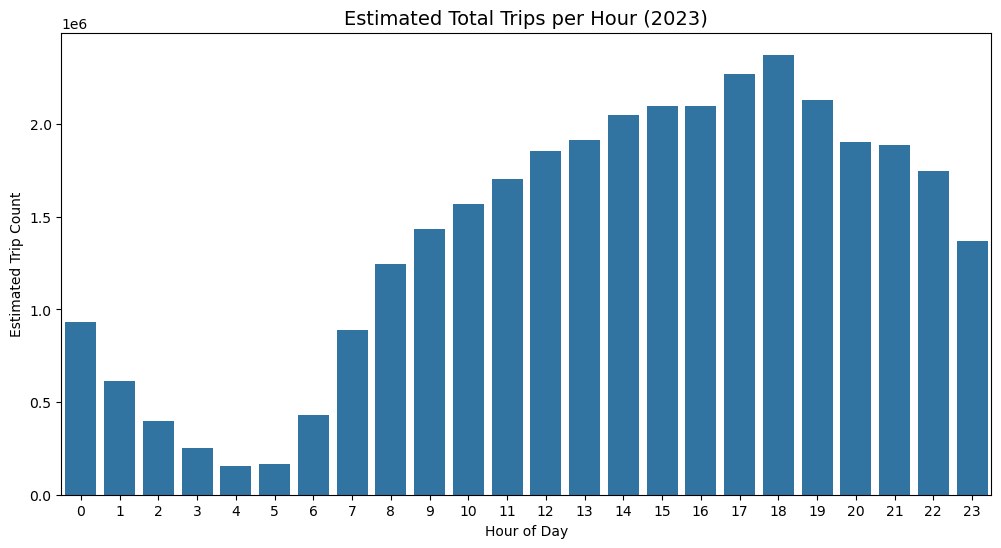

In [49]:
# Visualise the number of trips per hour and find the busiest hour
sample_size = len(tf)
full_data_size = 33500000  
sampling_ratio = sample_size / full_data_size

tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

hourly_counts = tf.groupby('pickup_hour').size().reset_index(name='sampled_trips')

hourly_counts['estimated_trips'] = hourly_counts['sampled_trips'] / sampling_ratio

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_counts, x='pickup_hour', y='estimated_trips')

plt.title('Estimated Total Trips per Hour (2023)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Trip Count')
plt.xticks(range(0, 24))
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [50]:
# Scale up the number of trips

sample_size = len(tf)
full_data_size = 33500000  
sample_fraction = sample_size / full_data_size

tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

hourly_trip_counts = tf.groupby('pickup_hour').size().reset_index(name='sampled_trip_count')

hourly_trip_counts['estimated_total_trips'] = hourly_trip_counts['sampled_trip_count'] / sample_fraction

top_5_hours = hourly_trip_counts.sort_values(by='estimated_total_trips', ascending=False).head(5)

print("Top 5 busiest hours (estimated total trips):")
print(top_5_hours)


Top 5 busiest hours (estimated total trips):
    pickup_hour  sampled_trip_count  estimated_total_trips
18           18               20175           2.375290e+06
17           17               19309           2.273332e+06
19           19               18103           2.131344e+06
15           15               17846           2.101086e+06
16           16               17821           2.098143e+06


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

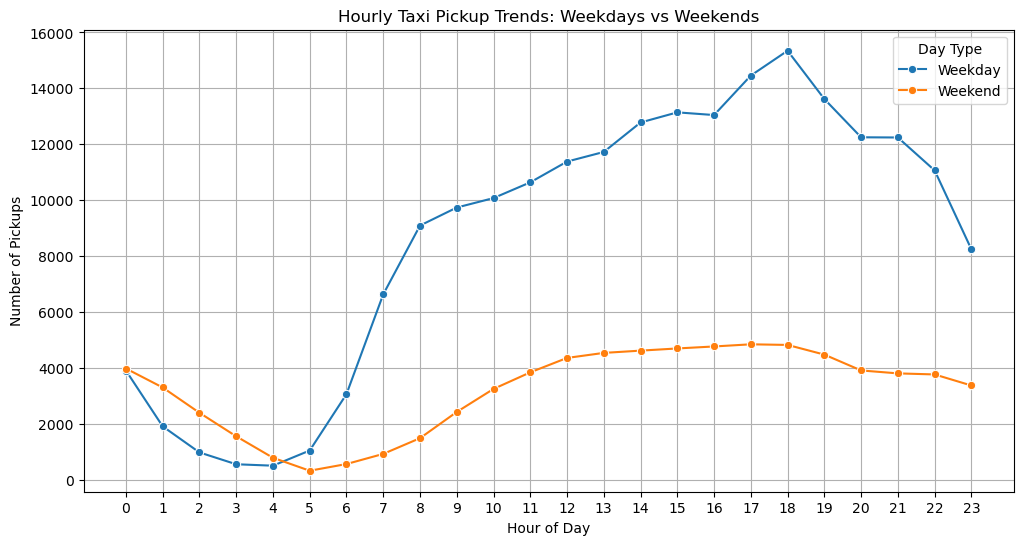

In [51]:
# Compare traffic trends for the week days and weekends
tf['pickup_dayofweek'] = tf['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

tf['day_type'] = tf['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type
hourly_trend = tf.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Taxi Pickup Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [52]:
# Find top 10 pickup and dropoff zones

top_pu = tf['PULocationID'].value_counts().reset_index()
top_pu.columns = ['LocationID', 'pickup_trip_count']

top_do = tf['DOLocationID'].value_counts().reset_index()
top_do.columns = ['LocationID', 'dropoff_trip_count']

top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
top_do = top_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Get top 10
top_10_pu = top_pu.head(10)
top_10_do = top_do.head(10)

# Display results
print("Top 10 Pickup Zones:")
display(top_10_pu[['zone', 'pickup_trip_count']])

print("\nTop 10 Dropoff Zones:")
display(top_10_do[['zone', 'dropoff_trip_count']])

Top 10 Pickup Zones:


zone  pickup_trip_count
0                   JFK Airport              15030
1         Upper East Side South              13470
2                Midtown Center              13364
3         Upper East Side North              12036
4                  Midtown East              10311
5             LaGuardia Airport               9922
6  Penn Station/Madison Sq West               9745
7     Times Sq/Theatre District               9513
8           Lincoln Square East               9348
9                   Murray Hill               8428


Top 10 Dropoff Zones:


zone  dropoff_trip_count
0      Upper East Side North               12741
1      Upper East Side South               12015
2             Midtown Center               11155
3  Times Sq/Theatre District                8657
4                Murray Hill                8514
5               Midtown East                8122
6        Lincoln Square East                8056
7      Upper West Side South                7936
8            Lenox Hill West                7404
9               East Chelsea                7254

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [53]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = tf['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = tf['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

zone_flow = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

zone_flow['pickup_dropoff_ratio'] = zone_flow['pickup_count'] / (zone_flow['dropoff_count'] + 1e-6)  # avoid division by zero

zone_flow = zone_flow.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

top_10_ratio = zone_flow.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

bottom_10_ratio = zone_flow[zone_flow['dropoff_count'] > 0].sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios:")
display(top_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios:")
display(bottom_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:


zone  pickup_count  dropoff_count  \
69                  East Elmhurst        1306.0            152   
125                   JFK Airport       15030.0           3172   
131             LaGuardia Airport        9922.0           3399   
177  Penn Station/Madison Sq West        9745.0           6406   
41                   Central Park        4841.0           3525   
239                  West Village        6374.0           4661   
108       Greenwich Village South        3684.0           2753   
155                  Midtown East       10311.0           8122   
154                Midtown Center       13364.0          11155   
224                      Union Sq        7732.0           6515   

     pickup_dropoff_ratio  
69               8.592105  
125              4.738335  
131              2.919094  
177              1.521230  
41               1.373333  
239              1.367518  
108              1.338177  
155              1.269515  
154              1.198028  
224              1.186800


Bottom 10 Pickup/Dropoff Ratios:


zone  pickup_count  dropoff_count  \
6                           Astoria Park           0.0              4   
28                         Broad Channel           0.0              3   
25   Breezy Point/Fort Tilden/Riis Beach           0.0              5   
57                          Country Club           0.0             10   
58                          Crotona Park           0.0              1   
105                  Green-Wood Cemetery           0.0              3   
97                       Freshkills Park           0.0              1   
149                      Mariners Harbor           0.0              1   
196            Saint George/New Brighton           0.0              4   
174                           Pelham Bay           0.0             10   

     pickup_dropoff_ratio  
6                     0.0  
28                    0.0  
25                    0.0  
57                    0.0  
58                    0.0  
105                   0.0  
97                    0.0  
149                   0.0  
196                   0.0  
174                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [54]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

night_tf = tf[(tf['pickup_hour'] >= 23) | (tf['pickup_hour'] <= 5)]

night_pickup_counts = night_tf['PULocationID'].value_counts().head(10).reset_index()
night_pickup_counts.columns = ['LocationID', 'pickup_count']
night_pickup_counts = night_pickup_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

night_dropoff_counts = night_tf['DOLocationID'].value_counts().head(10).reset_index()
night_dropoff_counts.columns = ['LocationID', 'dropoff_count']
night_dropoff_counts = night_dropoff_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

print(" Top 10 Pickup Zones (11 PM to 5 AM):")
display(night_pickup_counts[['zone', 'pickup_count']])

print("\nTop 10 Dropoff Zones (11 PM to 5 AM):")
display(night_dropoff_counts[['zone', 'dropoff_count']])


 Top 10 Pickup Zones (11 PM to 5 AM):


zone  pickup_count
0                  East Village          2386
1                   JFK Airport          2192
2                  West Village          1966
3                  Clinton East          1552
4               Lower East Side          1500
5       Greenwich Village South          1302
6     Times Sq/Theatre District          1290
7  Penn Station/Madison Sq West          1068
8             LaGuardia Airport           964
9                 Midtown South           931


Top 10 Dropoff Zones (11 PM to 5 AM):


zone  dropoff_count
0           East Village           1307
1           Clinton East           1080
2            Murray Hill            954
3               Gramercy            900
4           East Chelsea            893
5        Lenox Hill West            821
6         Yorkville West            789
7           West Village            727
8               Flatiron            692
9  Upper East Side North            688

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [55]:
# Filter for night hours (11 PM to 5 AM)
tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

night_mask = (tf['pickup_hour'] >= 23) | (tf['pickup_hour'] <= 5)
day_mask = (tf['pickup_hour'] >= 6) & (tf['pickup_hour'] <= 22)

night_revenue = tf.loc[night_mask, 'total_amount'].sum()
day_revenue = tf.loc[day_mask, 'total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime revenue share: {night_share:.2f}%")
print(f"Daytime revenue share: {day_share:.2f}%")

Nighttime revenue share: 11.84%
Daytime revenue share: 88.16%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.552089
1              2.0                     6.220713
2              3.0                     4.497536
3              4.0                     4.909678
4              5.0                     1.584294
5              6.0                     1.279150


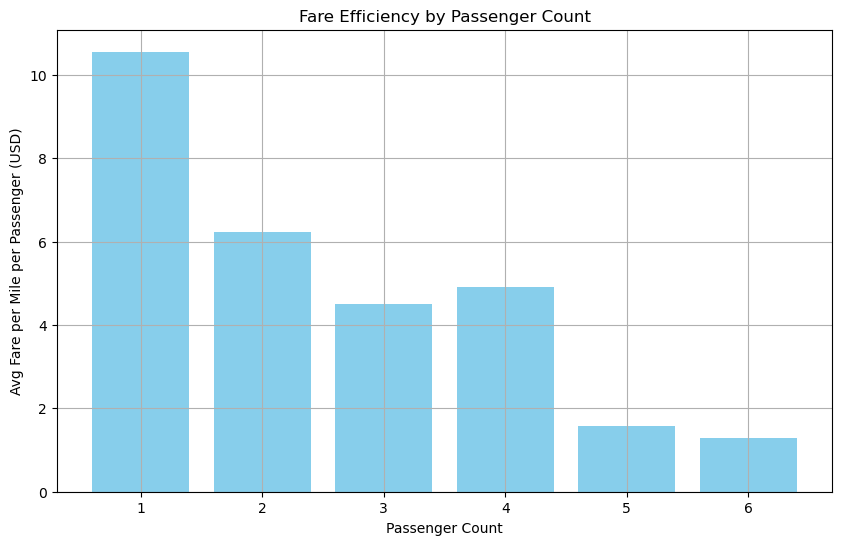

In [89]:
# Analyse the fare per mile per passenger for different passenger counts

valid_tf = tf[(tf['trip_distance'] > 0) & (tf['passenger_count'] > 0)].copy()

valid_tf['fare_per_mile_per_passenger'] = valid_tf['fare_amount'] / (valid_tf['trip_distance'] * valid_tf['passenger_count'])

avg_fare_by_passenger = valid_tf.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print(avg_fare_by_passenger)

plt.figure(figsize=(10, 6))
plt.bar(avg_fare_by_passenger['passenger_count'], avg_fare_by_passenger['fare_per_mile_per_passenger'], color='skyblue')
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare per Mile per Passenger (USD)")
plt.title("Fare Efficiency by Passenger Count")
plt.grid(True)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

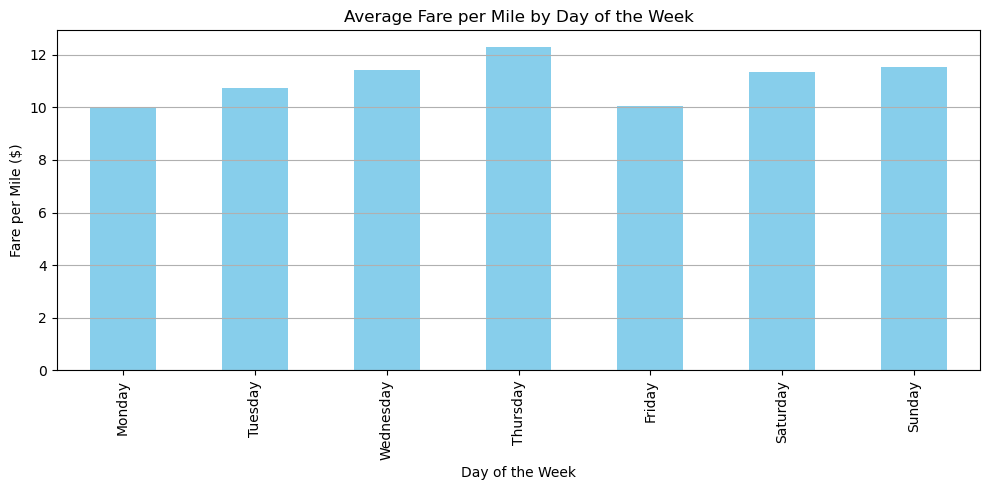

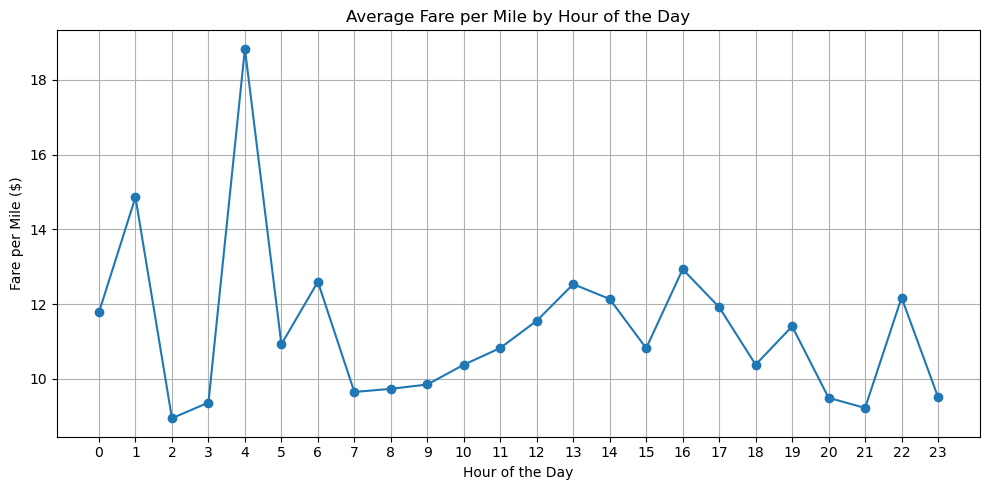

In [57]:
# Compare the average fare per mile for different days and for different times of the day

tf['tpep_pickup_datetime'] = pd.to_datetime(tf['tpep_pickup_datetime'])

valid_fares = tf[(tf['fare_amount'] > 0) & (tf['trip_distance'] > 0)].copy()

valid_fares['fare_per_mile'] = valid_fares['fare_amount'] / valid_fares['trip_distance']

# Extract day of week and hour from pickup time
valid_fares['pickup_day'] = valid_fares['tpep_pickup_datetime'].dt.day_name()
valid_fares['pickup_hour'] = valid_fares['tpep_pickup_datetime'].dt.hour


avg_fare_day = valid_fares.groupby('pickup_day')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
avg_fare_day.plot(kind='bar', color='skyblue')
plt.title('Average Fare per Mile by Day of the Week')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of the Week')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


avg_fare_hour = valid_fares.groupby('pickup_hour')['fare_per_mile'].mean()

plt.figure(figsize=(10,5))
avg_fare_hour.plot(kind='line', marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

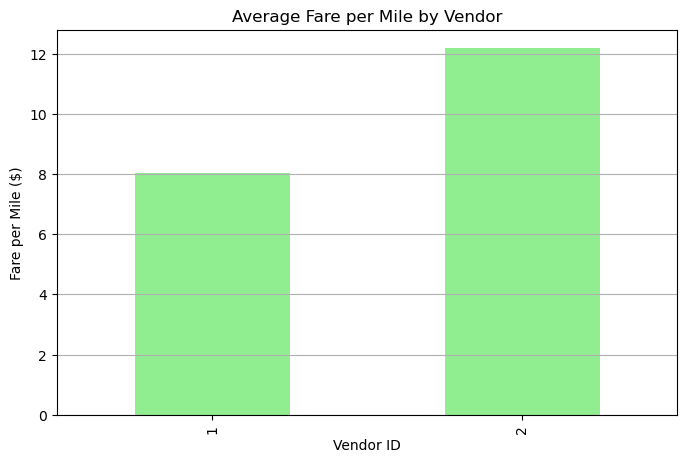

In [67]:
# Compare fare per mile for different vendors
vendor_df = tf[(tf['fare_amount'] > 0) & (tf['trip_distance'] > 0) & (tf['VendorID'].notna())].copy()

# Compute fare per mile
vendor_df['fare_per_mile'] = vendor_df['fare_amount'] / vendor_df['trip_distance']

# Group by VendorID
vendor_avg_fare = vendor_df.groupby('VendorID')['fare_per_mile'].mean()

# Plot
plt.figure(figsize=(8, 5))
vendor_avg_fare.plot(kind='bar', color='lightgreen')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


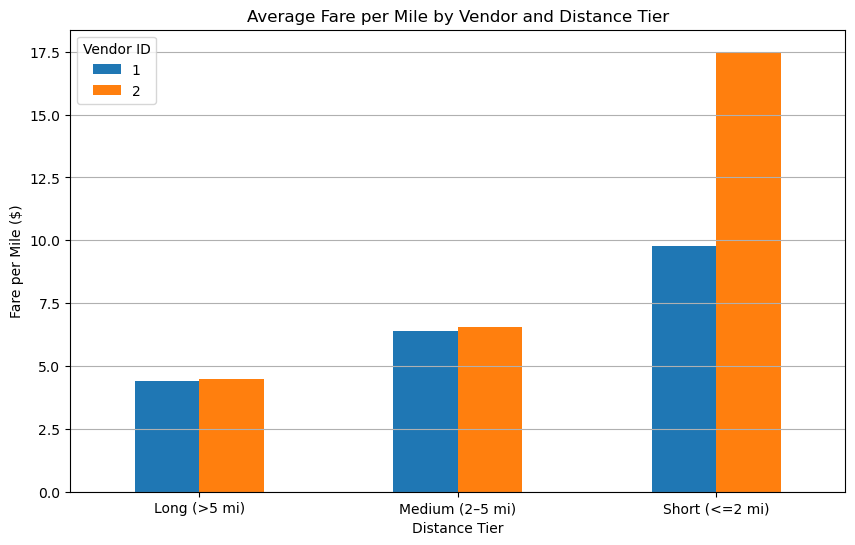

In [66]:
# Defining distance tiers
tiered_df = tf[(tf['fare_amount'] > 0) & 
               (tf['trip_distance'] > 0) & 
               (tf['VendorID'].notna())].copy()

# Compute fare per mile
tiered_df['fare_per_mile'] = tiered_df['fare_amount'] / tiered_df['trip_distance']

# Define distance tiers
def assign_tier(dist):
    if dist <= 2:
        return 'Short (<=2 mi)'
    elif dist <= 5:
        return 'Medium (2–5 mi)'
    else:
        return 'Long (>5 mi)'

tiered_df['distance_tier'] = tiered_df['trip_distance'].apply(assign_tier)

tier_avg = tiered_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

tier_pivot = tier_avg.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')

tier_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

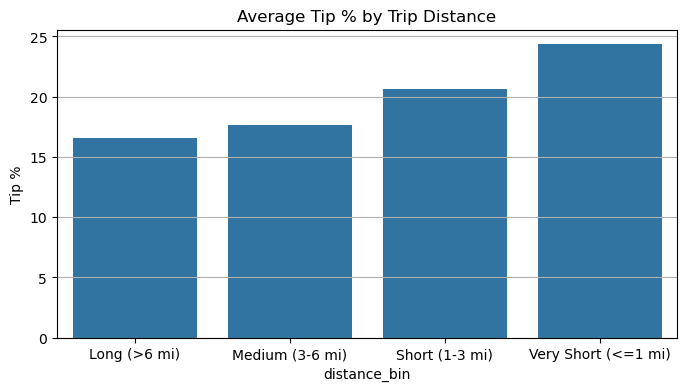

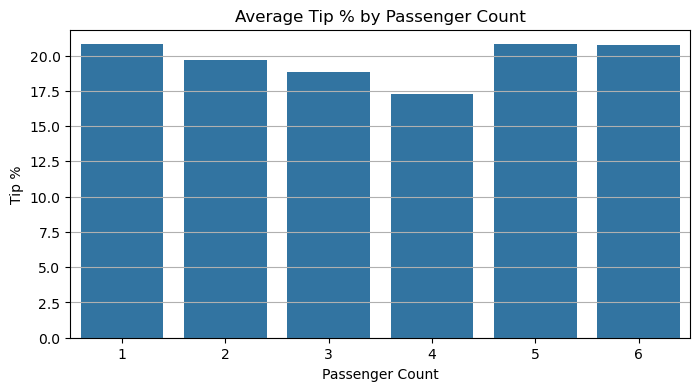

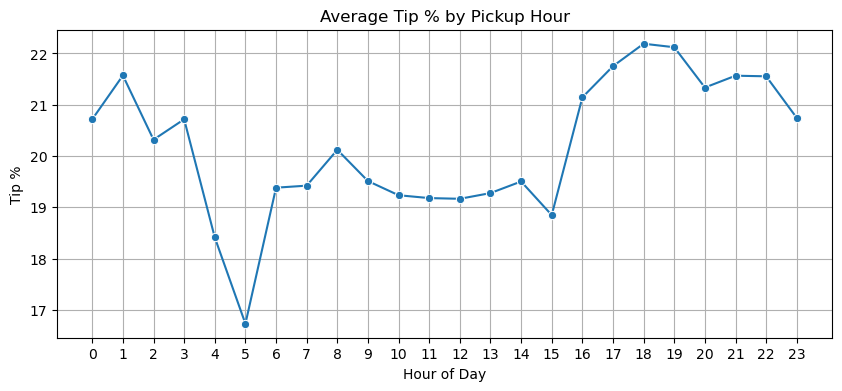

In [68]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

valid_tips = tf[(tf['fare_amount'] > 0) & (tf['tip_amount'] >= 0)].copy()

valid_tips['tip_percent'] = (valid_tips['tip_amount'] / valid_tips['fare_amount']) * 100

# range by distance
def distance_bin(d):
    if d <= 1:
        return 'Very Short (<=1 mi)'
    elif d <= 3:
        return 'Short (1-3 mi)'
    elif d <= 6:
        return 'Medium (3-6 mi)'
    else:
        return 'Long (>6 mi)'

valid_tips['distance_bin'] = valid_tips['trip_distance'].apply(distance_bin)

valid_tips['pickup_hour'] = pd.to_datetime(valid_tips['tpep_pickup_datetime']).dt.hour

# --- Analysis 1: Tip % by distance bin ---
distance_tip = valid_tips.groupby('distance_bin')['tip_percent'].mean().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=distance_tip.index, y=distance_tip.values)
plt.title('Average Tip % by Trip Distance')
plt.ylabel('Tip %')
plt.grid(axis='y')
plt.show()

# --- Analysis 2: Tip % by passenger count ---
passenger_tip = valid_tips.groupby('passenger_count')['tip_percent'].mean()
plt.figure(figsize=(8, 4))
sns.barplot(x=passenger_tip.index.astype(int), y=passenger_tip.values)
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.grid(axis='y')
plt.show()

# --- Analysis 3: Tip % by pickup hour ---
hourly_tip = valid_tips.groupby('pickup_hour')['tip_percent'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_tip.index, y=hourly_tip.values, marker='o')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip %')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Summary (<10%):
       trip_distance   fare_amount  total_amount  passenger_count
count   75115.000000  75115.000000  75115.000000     75115.000000
mean        3.807979     21.540650     27.759511         1.424336
std         5.067919     20.944439     22.956279         0.904606
min         0.000000      0.010000      1.010000         1.000000
25%         1.020000      9.300000     14.700000         1.000000
50%         1.830000     14.200000     19.900000         1.000000
75%         3.900000     24.500000     30.100000         2.000000
max        75.500000    455.200000    488.700000         6.000000

High Tip Summary (>25%):
       trip_distance    fare_amount   total_amount  passenger_count
count  127426.000000  127426.000000  127426.000000    127426.000000
mean        2.286025      14.371098      25.060876         1.362540
std         2.890177      11.664505      17.368907         0.864865
min         0.000000       0.050000       1.130000         1.000000
25%         0.92

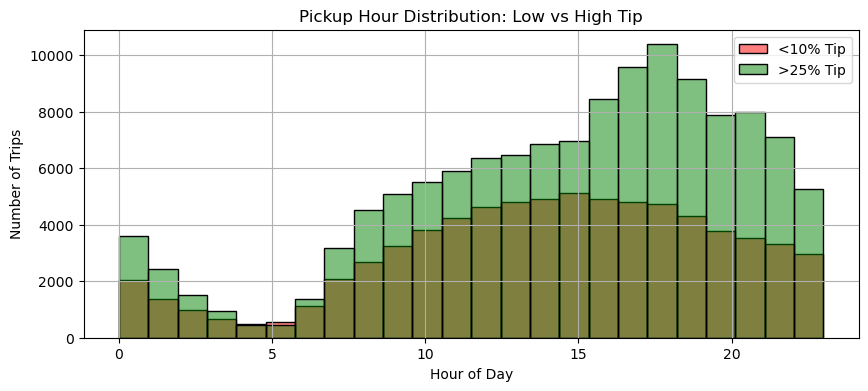


Payment Type Tip Distribution (%):
tip_percent    <10%  10–25%   >25%
payment_type                      
1             10.06   35.07  54.88
2             99.99    0.00   0.01
3             99.77    0.00   0.23
4             99.81    0.05   0.15


In [69]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

valid = tf[(tf['fare_amount'] > 0) & (tf['tip_amount'] >= 0)].copy()
valid['tip_percent'] = (valid['tip_amount'] / valid['fare_amount']) * 100

low_tip = valid[valid['tip_percent'] < 10].copy()
high_tip = valid[valid['tip_percent'] > 25].copy()

# Summary statistics
print("Low Tip Summary (<10%):")
print(low_tip[['trip_distance', 'fare_amount', 'total_amount', 'passenger_count']].describe())
print("\nHigh Tip Summary (>25%):")
print(high_tip[['trip_distance', 'fare_amount', 'total_amount', 'passenger_count']].describe())

low_tip['pickup_hour'] = pd.to_datetime(low_tip['tpep_pickup_datetime']).dt.hour
high_tip['pickup_hour'] = pd.to_datetime(high_tip['tpep_pickup_datetime']).dt.hour

plt.figure(figsize=(10, 4))
sns.histplot(low_tip['pickup_hour'], bins=24, kde=False, label='<10% Tip', color='red', alpha=0.5)
sns.histplot(high_tip['pickup_hour'], bins=24, kde=False, label='>25% Tip', color='green', alpha=0.5)
plt.title('Pickup Hour Distribution: Low vs High Tip')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()

tip_comparison = pd.crosstab(index=valid['payment_type'], columns=pd.cut(valid['tip_percent'], bins=[-1,10,25,100], labels=["<10%", "10–25%", ">25%"]), normalize='index') * 100
print("\nPayment Type Tip Distribution (%):")
print(tip_comparison.round(2))

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

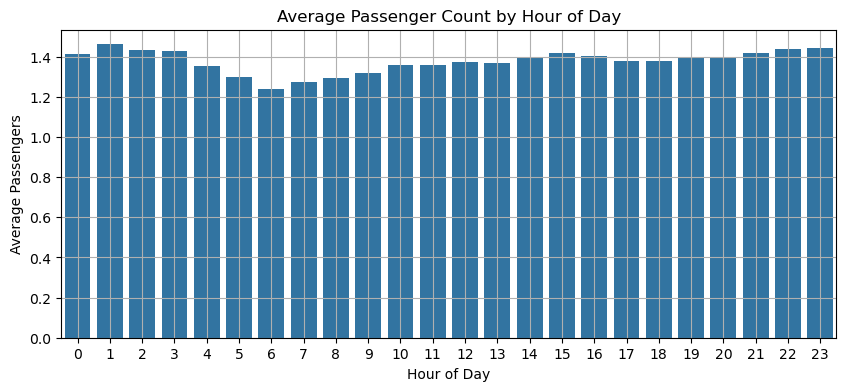

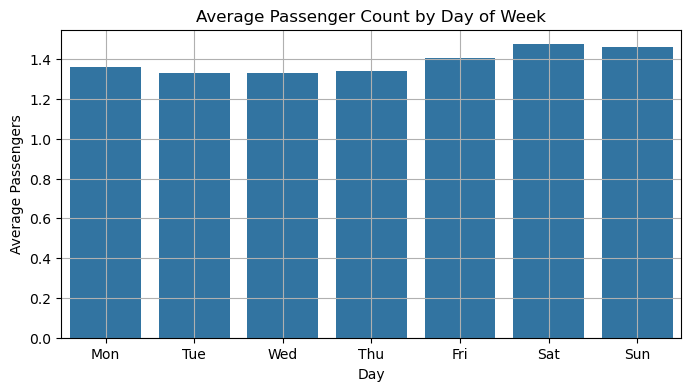

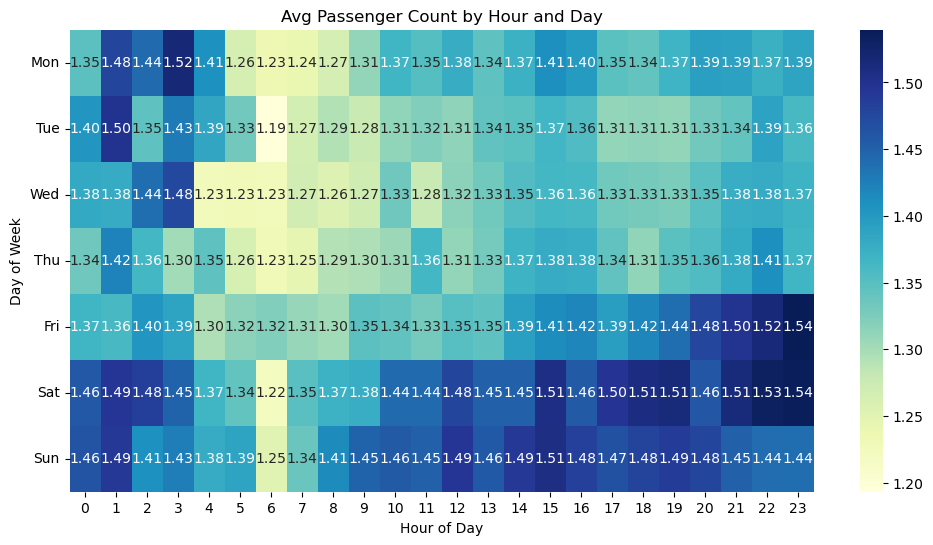

In [73]:
# See how passenger count varies across hours and days

tf['pickup_datetime'] = pd.to_datetime(tf['tpep_pickup_datetime'])

tf['pickup_hour'] = tf['pickup_datetime'].dt.hour
tf['pickup_day'] = tf['pickup_datetime'].dt.dayofweek  # 0=Mon, 6=Sun

hourly_passenger = tf.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=hourly_passenger.index, y=hourly_passenger.values)
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passengers")
plt.grid(True)
plt.show()

daily_passenger = tf.groupby('pickup_day')['passenger_count'].mean()
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 4))
sns.barplot(x=day_labels, y=daily_passenger.values)
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Passengers")
plt.grid(True)
plt.show()

pivot = tf.pivot_table(index='pickup_day', columns='pickup_hour', values='passenger_count', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=1)
plt.title("Avg Passenger Count by Hour and Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.yticks(ticks=[0.5+i for i in range(7)], labels=day_labels, rotation=0)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

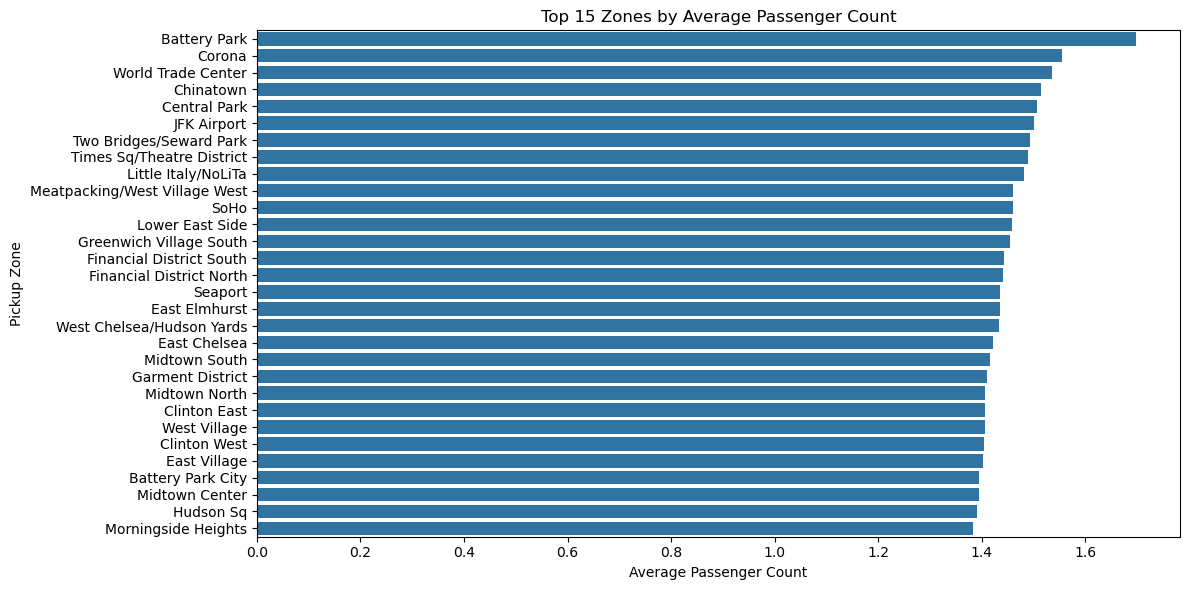

In [82]:
# How does passenger count vary across zones
tf = tf.drop(columns=[col for col in tf.columns if col in zones.columns], errors='ignore')

tf = tf.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

zone_passenger_stats = tf.groupby('zone')['passenger_count'].agg(['mean', 'count']).reset_index()
zone_passenger_stats.columns = ['zone', 'mean_passenger_count', 'trip_count']

zone_passenger_stats = zone_passenger_stats[zone_passenger_stats['trip_count'] > 100]

zone_passenger_stats = zone_passenger_stats.sort_values(by='mean_passenger_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='mean_passenger_count', y='zone', data=zone_passenger_stats.head(30))
plt.title('Top 15 Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

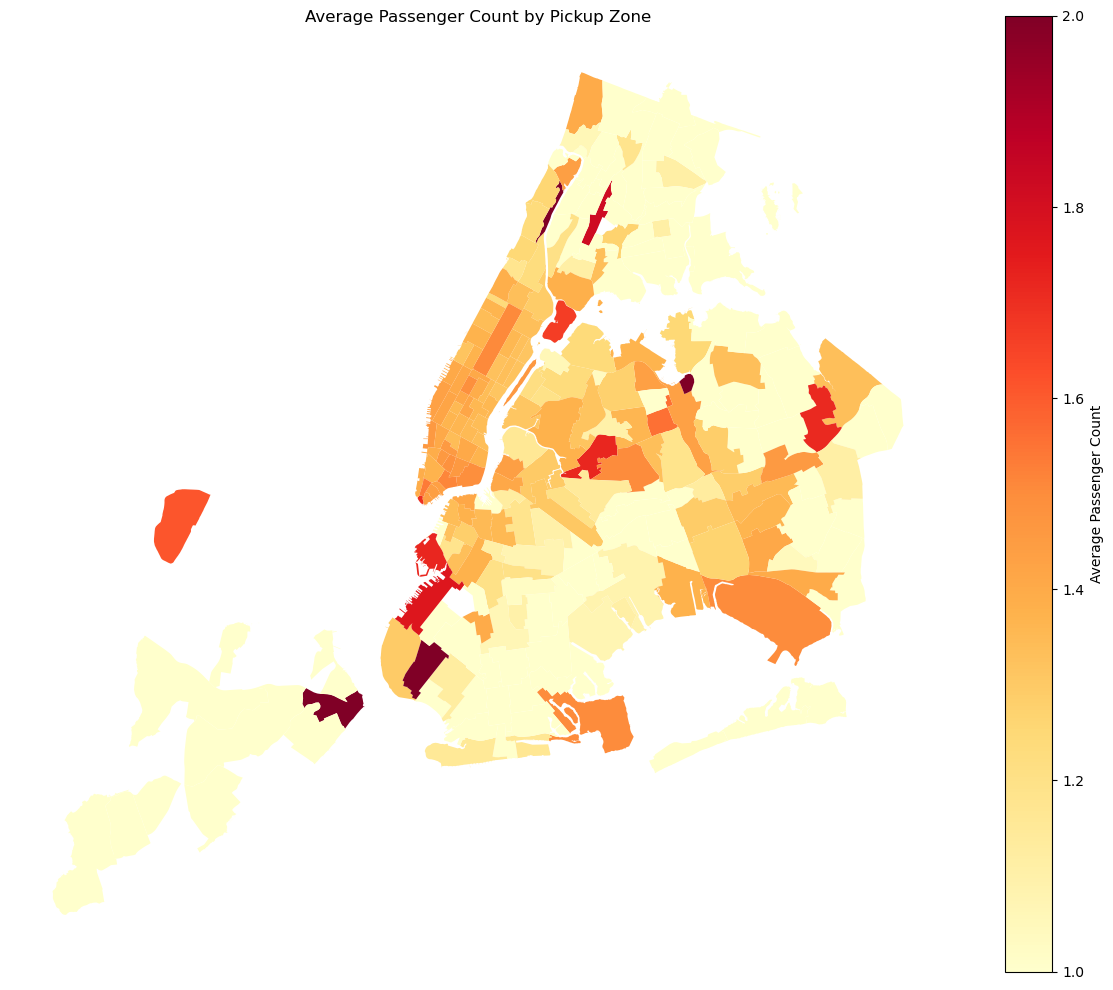

In [84]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = zones.merge(tf.groupby('PULocationID').size().reset_index(name='trip_count'),
                               left_on='LocationID', right_on='PULocationID', how='left')

avg_passenger_by_zone = tf.groupby('zone')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['zone', 'avg_passenger_count']

# Merge it into zones_with_trips
zones_with_passenger = zones_with_trips.merge(avg_passenger_by_zone, on='zone', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger.plot(column='avg_passenger_count',
                          ax=ax,
                          legend=True,
                          cmap='YlOrRd',
                          legend_kwds={'label': "Average Passenger Count",
                                       'orientation': "vertical"})
plt.title("Average Passenger Count by Pickup Zone")
plt.axis("off")
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently


--- extra ---
extra
0.00     109920
0.50          2
0.75          2
1.00      55867
1.25        233
1.75        484
2.25        145
2.45          2
2.50      73024
2.72          1
2.75        331
3.00          1
3.20          9
3.25          2
3.50      16548
3.75        425
4.25        965
4.75          2
5.00      21077
5.25          4
6.00       2520
6.25        131
6.75        342
6.80          1
7.25         65
7.50       2487
7.75        213
8.50         57
8.75        330
9.25        970
9.75         80
10.00        80
10.25       244
11.25        68
11.75       173
12.50         1
14.25         1
Name: count, dtype: int64

--- mta_tax ---
mta_tax
0.00      2439
0.05         4
0.50    284355
0.80         9
Name: count, dtype: int64

--- improvement_surcharge ---
improvement_surcharge
0.0        13
0.3       129
1.0    286665
Name: count, dtype: int64

--- congestion_surcharge ---
congestion_surcharge
0.0     22804
2.5    264003
Name: count, dtype: int64

--- airport_fee ---
air

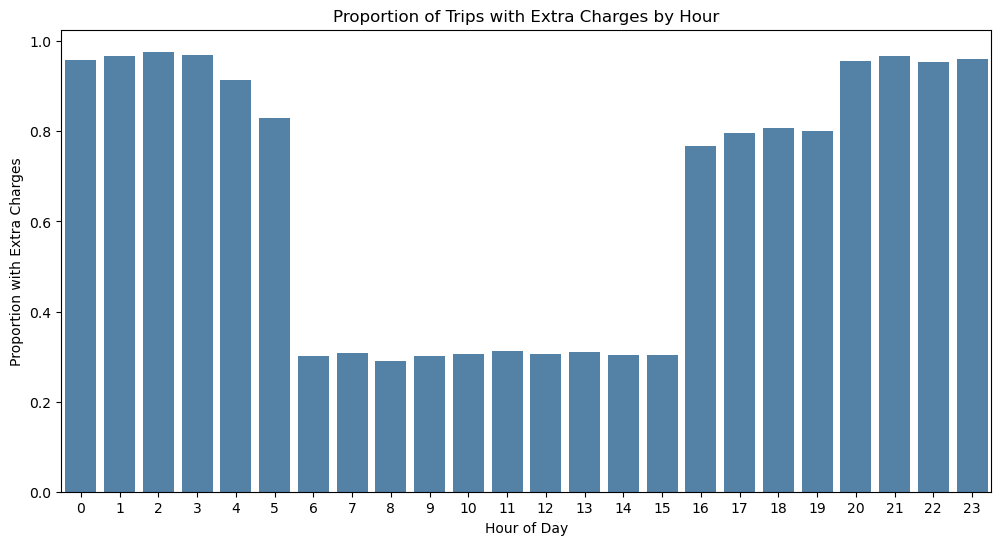

Top 10 zones by proportion of extra charges applied:
                          zone  extra_applied_ratio
40                 City Island             1.000000
103            Highbridge Park             1.000000
166              Port Richmond             1.000000
198                  Stapleton             1.000000
217         Van Cortlandt Park             1.000000
121          LaGuardia Airport             0.988914
230  Williamsburg (North Side)             0.893333
131            Lower East Side             0.837447
61               East Elmhurst             0.834609
1                Alphabet City             0.812950


In [87]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for col in surcharge_columns:
    print(f"\n--- {col} ---")
    print(tf[col].value_counts().sort_index())

tf['pickup_hour'] = tf['tpep_pickup_datetime'].dt.hour

extra_hourly = tf.groupby('pickup_hour')['extra'].apply(lambda x: (x > 0).mean()).reset_index()
extra_hourly.columns = ['pickup_hour', 'extra_applied_ratio']

plt.figure(figsize=(12, 6))
sns.barplot(data=extra_hourly, x='pickup_hour', y='extra_applied_ratio', color='steelblue')
plt.title("Proportion of Trips with Extra Charges by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion with Extra Charges")
plt.show()

zone_extra = tf.groupby('zone')['extra'].apply(lambda x: (x > 0).mean()).reset_index()
zone_extra.columns = ['zone', 'extra_applied_ratio']
zone_extra = zone_extra.sort_values(by='extra_applied_ratio', ascending=False)

print("Top 10 zones by proportion of extra charges applied:")
print(zone_extra.head(10))

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

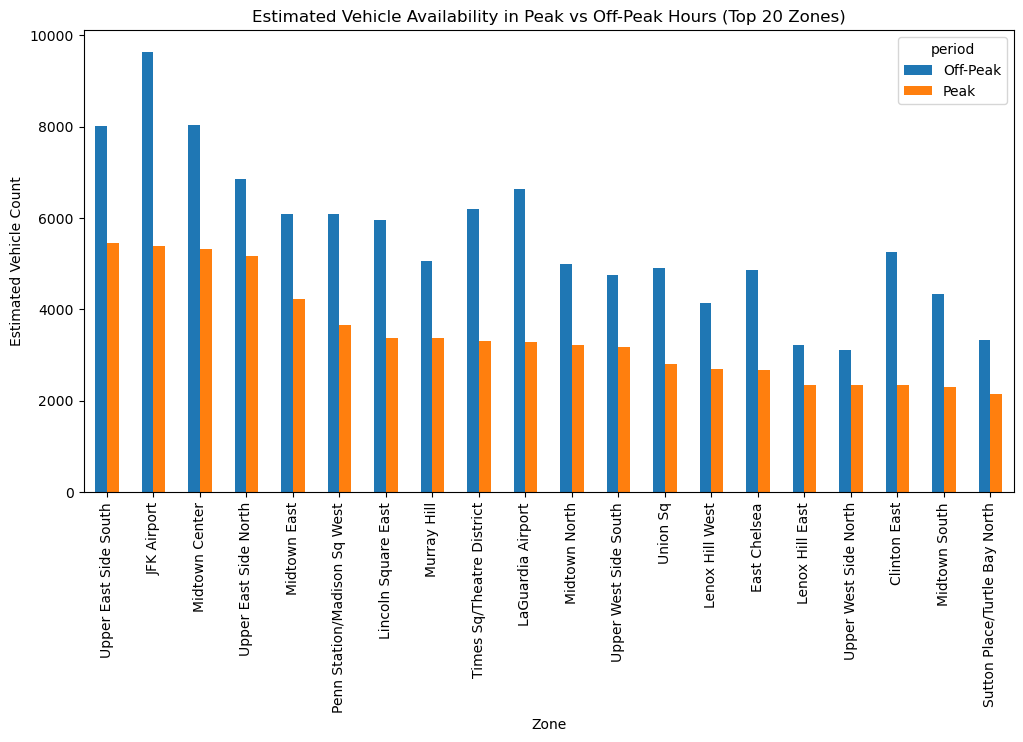

In [101]:
#Demand is higher in late afternoon and evening hours (3 PM – 9 PM) across all days.

#Weekend traffic, especially Saturday and Sunday, sees consistently higher average passenger counts and more trips per hour.

#Recommendation:

#Increase fleet availability in afternoon-to-evening time windows.

#Schedule driver shift rotations to peak on weekends and evenings.

#Use time-based surge pricing to flatten overly concentrated demand.

tf['dropoff_hour'] = tf['tpep_dropoff_datetime'].dt.hour
zone_hour_availability = (
    tf.groupby(['DOLocationID', 'dropoff_hour'])
      .size()
      .reset_index(name='available_vehicles')
)
zone_hour_availability = (
    tf.groupby(['zone', 'dropoff_hour'])
      .size()
      .reset_index(name='available_vehicles')
)
def classify_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

zone_hour_availability['period'] = zone_hour_availability['dropoff_hour'].apply(classify_hour)

zone_period_availability = (
    zone_hour_availability
    .groupby(['zone', 'period'])['available_vehicles']
    .sum()
    .reset_index()
    .pivot(index='zone', columns='period', values='available_vehicles')
    .fillna(0)
)

zone_period_availability.sort_values('Peak', ascending=False).head(20).plot(
    kind='bar', figsize=(12,6), title='Estimated Vehicle Availability in Peak vs Off-Peak Hours (Top 20 Zones)'
)
plt.ylabel("Estimated Vehicle Count")
plt.xlabel("Zone")
plt.show()

#bsed on below chart number of vehicle counts at zones with high demand needs to be increased compared to zones with low demands

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Zones to Focus:

JFK Airport

LaGuardia Airport

Penn Station / Madison Sq West

Midtown Center

Upper East Side South

These zones show the highest pickup-to-dropoff ratios, indicating they are origination hotspots.

Action:

Maintain a reserve fleet near JFK & LGA airports especially from 6 AM to 12 PM and 6 PM to 9 PM.

Position cabs near Midtown and Upper East Side during weekdays' office hours (8 AM to 6 PM) and evening rush (4 PM – 7 PM).

Night rides contribute ~11.8% of total revenue.

Zones like East Elmhurst, Airports, and West Village have higher night pickups.

Action:

Assign cabs with higher safety/compliance features to cover high-demand night zones.

Position drivers near nightlife centers: Greenwich Village, West Village, Times Sq.

Peak hours: 3 PM to 8 PM (especially 5 PM–7 PM) show the highest estimated trip volumes.

Action:

Stagger driver shifts to ensure higher vehicle availability in the afternoon-evening window.

Use in-app incentives for drivers to stay active during those hours in busy zones.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Short trips (0–2 miles) have high fare per mile, indicating customer tolerance for higher rates.

Longer trips (5+ miles) show lower fare per mile, indicating price sensitivity.

Recommendation:

Introduce mild premium rates for short, high-demand zones (e.g., Midtown, JFK–Manhattan).

Offer discounts or flat rates on long-distance rides (e.g., outer borough to Manhattan) to encourage bookings.

Peak hours (15:00–19:00) had the highest ride volume.

Nighttime contributes only ~11.84% of total revenue.

Recommendation:

Apply surcharge multipliers (1.2x–1.5x) during peak hours.

Offer off-peak discounts (e.g., 10% off from 11PM–6AM) to balance demand and increase utilization at night.

Zones like JFK Airport, LaGuardia, Penn Station, and Upper East Side show high trip density.

Recommendation:

Consider zone-based entry or exit fees (e.g., a fixed airport pickup/drop fee).

Bundle surcharges like congestion or airport fees into transparent pricing to avoid tipping disincentives.

Vendor 2 had lower fare per mile compared to Vendor 1.

Customers tipped more with Vendor 1, but Vendor 2 had greater volume.

Recommendation:

For Vendor 1: Emphasize premium service + tip-based loyalty incentives.

For Vendor 2: Use volume-based fare discounts (e.g., 5th ride 10% off).


